In this notebook, we check Chebyshev's inequality on real-life data.

The file Earthquake_Data.csv contains all recorded earthquakes that happened between 6/28/2020 and 7/28/2020. We first create a histogram of magnitudes of recorded earthquakes. Then, compute both sides of the Chebyshev's inequality for different t values and plot them.

In [1]:
import pandas as pd

df = pd.read_csv('Earthquake_Data.csv')

df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-06-28T00:01:23.153Z,-2.886400,129.243000,10.00,4.00,mb,NaN,72.00,2.846000,0.73,...,2020-07-10T04:23:50.040Z,"61 km NE of Amahai, Indonesia",earthquake,5.60,1.80,0.184,8.0,reviewed,us,us
1,2020-06-28T00:02:32.430Z,44.374333,-115.194000,6.13,2.39,ml,13.0,75.00,0.315000,0.18,...,2020-06-29T15:30:35.920Z,"69km ESE of Cascade, Idaho",earthquake,0.49,1.34,0.151,10.0,reviewed,mb,mb
2,2020-06-28T00:10:01.290Z,38.821335,-122.812164,2.79,1.15,md,32.0,41.00,0.002626,0.02,...,2020-06-28T00:18:03.356Z,"7km NW of The Geysers, CA",earthquake,0.19,0.36,0.050,6.0,automatic,nc,nc
3,2020-06-28T00:10:13.150Z,34.024833,-116.754667,16.59,0.98,ml,33.0,84.00,0.045290,0.14,...,2020-07-02T17:26:25.550Z,"12km NNE of Cabazon, CA",earthquake,0.19,0.40,0.141,16.0,reviewed,ci,ci
4,2020-06-28T00:14:42.395Z,61.382900,-150.005500,31.20,1.10,ml,NaN,NaN,NaN,0.48,...,2020-07-09T06:12:47.432Z,"2 km NNW of Point MacKenzie, Alaska",earthquake,NaN,0.90,NaN,NaN,reviewed,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14297,2020-07-28T19:59:09.900Z,38.842167,-122.825333,1.43,0.80,md,13.0,99.00,0.008698,0.02,...,2020-07-28T20:12:02.821Z,"9km WNW of Cobb, CA",earthquake,0.29,0.50,0.090,3.0,automatic,nc,nc
14298,2020-07-28T20:04:09.360Z,33.913167,-117.519167,2.24,0.91,ml,18.0,54.00,0.113700,0.25,...,2020-07-28T20:07:57.992Z,"3km SE of Norco, CA",earthquake,0.54,1.09,0.151,18.0,automatic,ci,ci
14299,2020-07-28T20:11:09.550Z,38.154800,-117.910500,3.90,0.90,ml,10.0,99.81,0.026000,0.05,...,2020-07-28T20:39:11.645Z,"31 km SSE of Mina, Nevada",earthquake,NaN,1.10,NaN,NaN,automatic,nn,nn
14300,2020-07-28T20:20:31.400Z,19.227333,-155.403336,34.27,2.15,md,36.0,146.00,NaN,0.11,...,2020-07-28T20:23:38.600Z,"8 km ENE of Pāhala, Hawaii",earthquake,0.66,0.82,0.330,13.0,automatic,hv,hv


<AxesSubplot:>

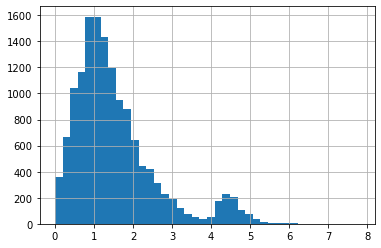

In [2]:
magDF = df['mag']
magDF.hist(bins=40)

# Jurassic Park "distribution"

In [3]:
import numpy as np

def chebyshevLHS(t):
    term1 = np.abs(magDF-magDF.mean())
    pr = np.sum(term1>=t)
    numRows = term1.shape[0]
    return pr/numRows

def chebyshevRHS(t):
    return magDF.var()/t**2
    
def checkChebyshevsIneq(t):
    return chebyshevRHS(t)-chebyshevLHS(t)

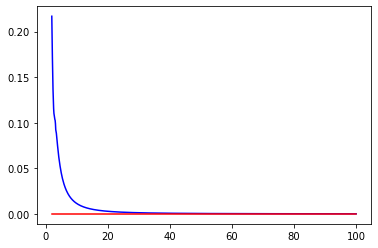

In [4]:
import matplotlib.pyplot as plt

a = 2
b = 100
n = 1000
tValues = np.linspace(a, b, n) # take n (evenly spaced) numbers from the interval [a,b)
yValues = [checkChebyshevsIneq(t) for t in tValues] # apply the function to each one of the values

plt.plot(tValues, yValues, 'blue')
plt.plot([a, b], [0, 0], 'red') # Chebyshev's inequality claims that the blue curve is always above the red line
plt.show()